[*********************100%***********************]  3 of 3 completed
c:\Users\Naim\Time Series Forecasting Model\scripts\financial_analysis.py:26: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method='linear').fillna(method='bfill')
c:\Users\Naim\Time Series Forecasting Model\scripts\financial_analysis.py:34: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='bfill').fillna(method='ffill')  # Ensure no remaining NaNs


Data Loaded
Missing Values:
 Ticker
BND     0
SPY     0
TSLA    0
dtype: int64
Summary Statistics:
 Ticker          BND          SPY         TSLA
count   2474.000000  2474.000000  2474.000000
mean      70.089252   310.253154   111.438965
std        4.889918   111.250656   110.120450
min       62.637585   157.328583     9.578000
25%       66.314077   214.822353    17.066167
50%       68.888950   275.812286    25.043000
75%       73.807495   402.297516   216.865002
max       79.812935   584.590027   409.970001


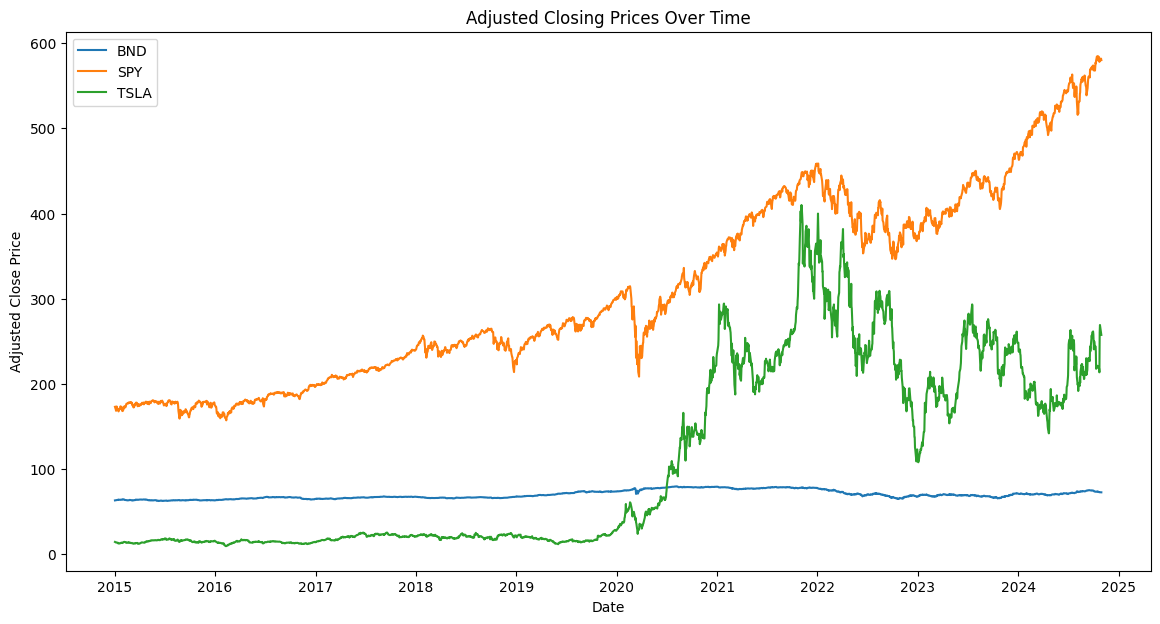

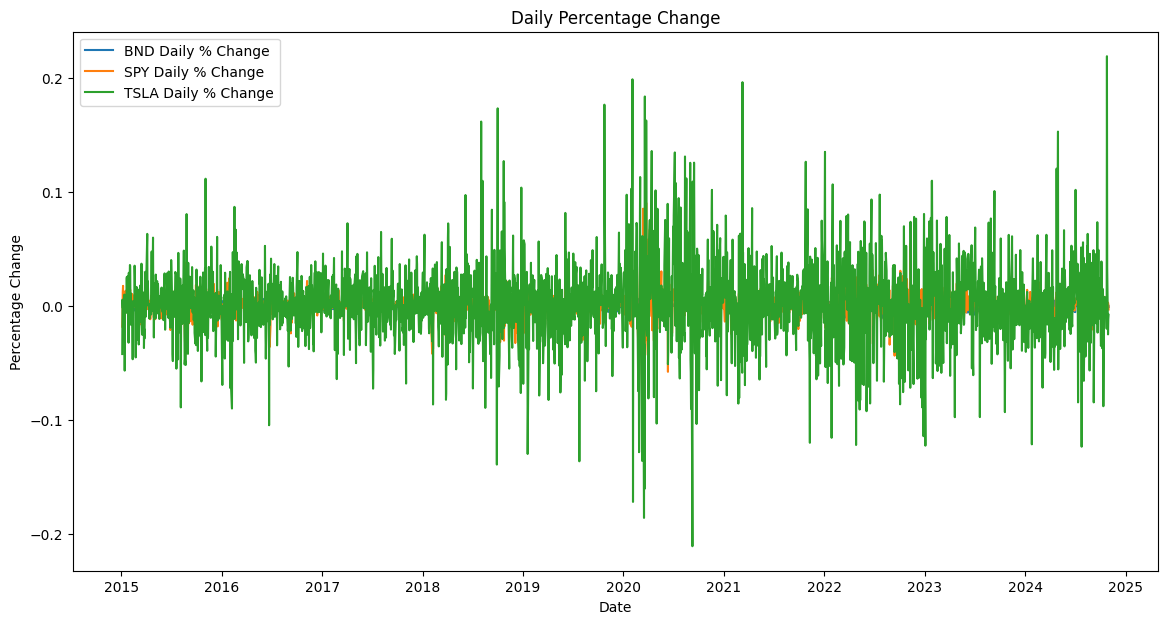

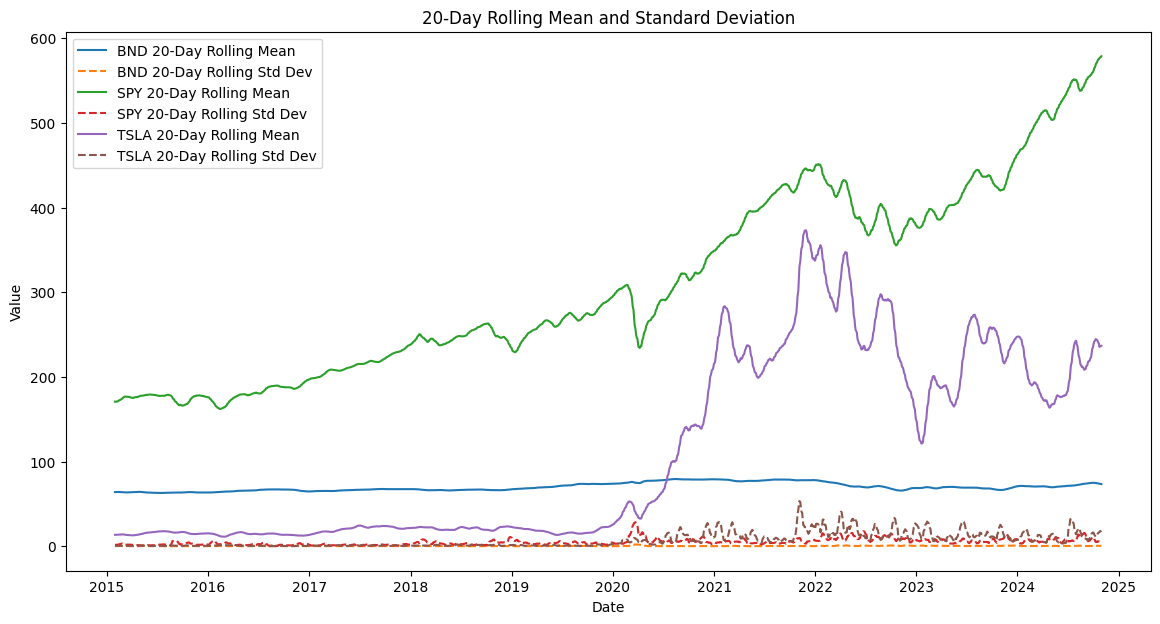

Outliers:
       BND  SPY     TSLA
0     NaN  NaN      NaN
1     NaN  NaN      NaN
2     NaN  NaN      NaN
3     NaN  NaN      NaN
4     NaN  NaN      NaN
...   ...  ...      ...
2468  NaN  NaN  0.21919
2469  NaN  NaN      NaN
2470  NaN  NaN      NaN
2471  NaN  NaN      NaN
2472  NaN  NaN      NaN

[2473 rows x 3 columns]


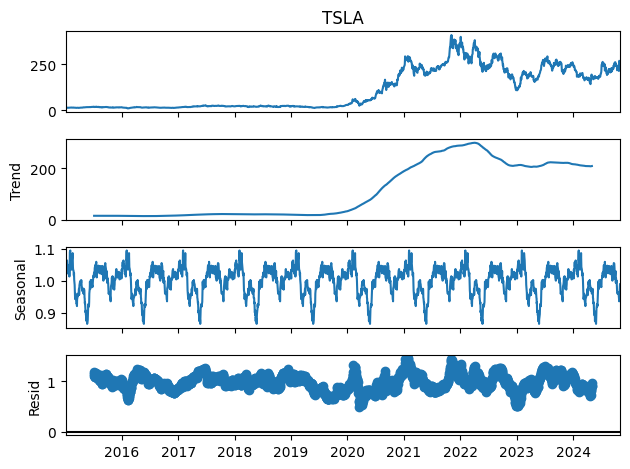

Value at Risk (5% confidence):
 Ticker
BND    -0.004798
SPY    -0.016764
TSLA   -0.051257
Name: 0.05, dtype: float64
Sharpe Ratio:
 Ticker
BND    -0.004994
SPY     0.042373
TSLA    0.048033
dtype: float64


In [1]:
# Import the module
import pandas as pd
import sys
import os

# Add the scripts directory to the Python path
sys.path.append(os.path.abspath('../scripts'))
from financial_analysis import *

# Define parameters
tickers = ['TSLA', 'BND', 'SPY']
start_date = '2015-01-01'
end_date = '2024-10-31'

# Step 1: Load data
data = load_data(tickers, start_date, end_date)
print("Data Loaded")

# Step 2: Clean data and check for missing values
cleaned_data, missing_values = clean_data(data)
print("Missing Values:\n", missing_values)

# Step 3: Data Summary
summary_stats = data_summary(cleaned_data)
print("Summary Statistics:\n", summary_stats)

# Step 4: Normalize Data (for ML Models if needed)
normalized_data = normalize_data(cleaned_data)

# Step 5: Plot Closing Prices Over Time
plot_closing_prices(cleaned_data)

# Step 6: Calculate and Plot Daily Percentage Change
pct_change = plot_daily_percentage_change(cleaned_data)

# Step 7: Rolling Mean and Standard Deviation (Volatility Analysis)
plot_rolling_stats(cleaned_data, window=20)

# Step 8: Outlier Detection
outliers = detect_outliers(pct_change)
print("Outliers:\n", outliers)

# Step 9: Decompose Time Series for TSLA (example)
decomposition = decompose_time_series(cleaned_data, 'TSLA')

# Step 10: Calculate Value at Risk (VaR) and Sharpe Ratio
var_95, sharpe_ratio = calculate_risk_metrics(cleaned_data)
print("Value at Risk (5% confidence):\n", var_95)
print("Sharpe Ratio:\n", sharpe_ratio)


In [2]:
import yfinance as yf
import pandas as pd

# Step 1: Load the data
tickers = ["TSLA", "BND", "SPY"]
#data = yf.download(tickers, start="2010-01-01", end="2023-01-01")['Adj Close']

# Step 2: Data cleaning and handling missing values
# Filling missing values
data = data.interpolate(method='linear').fillna(method='bfill')

# Step 3: Save the cleaned data to a CSV file
data.to_csv('../data/cleaned_financial_data.csv', index=True)  # index=True to include date as the first column

print("Data saved as cleaned_financial_data.csv")


C:\Users\Naim\AppData\Local\Temp\ipykernel_16952\236337357.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.interpolate(method='linear').fillna(method='bfill')


Data saved as cleaned_financial_data.csv


ADF Statistic: -1.1507672706146044
p-value: 0.6944080657685303
Critical Values:
   1%: -3.433026277967909
   5%: -2.862722353917318
   10%: -2.56739941472018
The series is likely non-stationary.
ADF Statistic: -10.08820100916535
p-value: 1.1404778247009134e-17
Critical Values:
   1%: -3.4330273737125445
   5%: -2.8627228377894505
   10%: -2.567399672341618
The series is likely stationary.
ADF Statistic: -10.08820100916535
p-value: 1.1404778247009134e-17
Critical Values:
   1%: -3.4330273737125445
   5%: -2.8627228377894505
   10%: -2.567399672341618
The series is likely stationary.
ADF Statistic: -10.08820100916535
p-value: 1.1404778247009134e-17
Critical Values:
   1%: -3.4330273737125445
   5%: -2.8627228377894505
   10%: -2.567399672341618
The series is likely stationary.


C:\Users\Naim\AppData\Local\Temp\ipykernel_16952\208337557.py:22: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  tsla_data_diff = tsla_data_diff.asfreq('D').fillna(method='ffill')  # forward fill
C:\Users\Naim\AppData\Local\Temp\ipykernel_16952\208337557.py:23: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  bnd_data_diff = bnd_data_diff.asfreq('D').fillna(method='ffill')
C:\Users\Naim\AppData\Local\Temp\ipykernel_16952\208337557.py:24: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  spy_data_diff = spy_data_diff.asfreq('D').fillna(method='ffill')
c:\Users\Naim\Time Series Forecasting Model\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequen

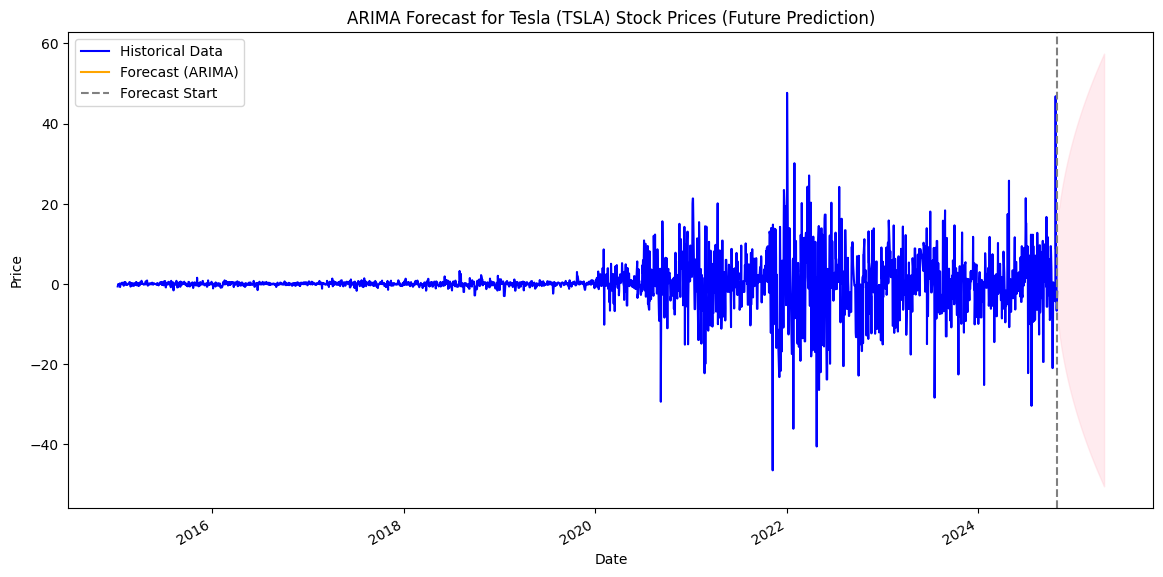

Forecast Summary:
Expected trend over the forecast period: upward
Confidence intervals show the range of possible price fluctuations.


c:\Users\Naim\Time Series Forecasting Model\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Naim\Time Series Forecasting Model\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Naim\Time Series Forecasting Model\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Naim\Time Series Forecasting Model\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling th

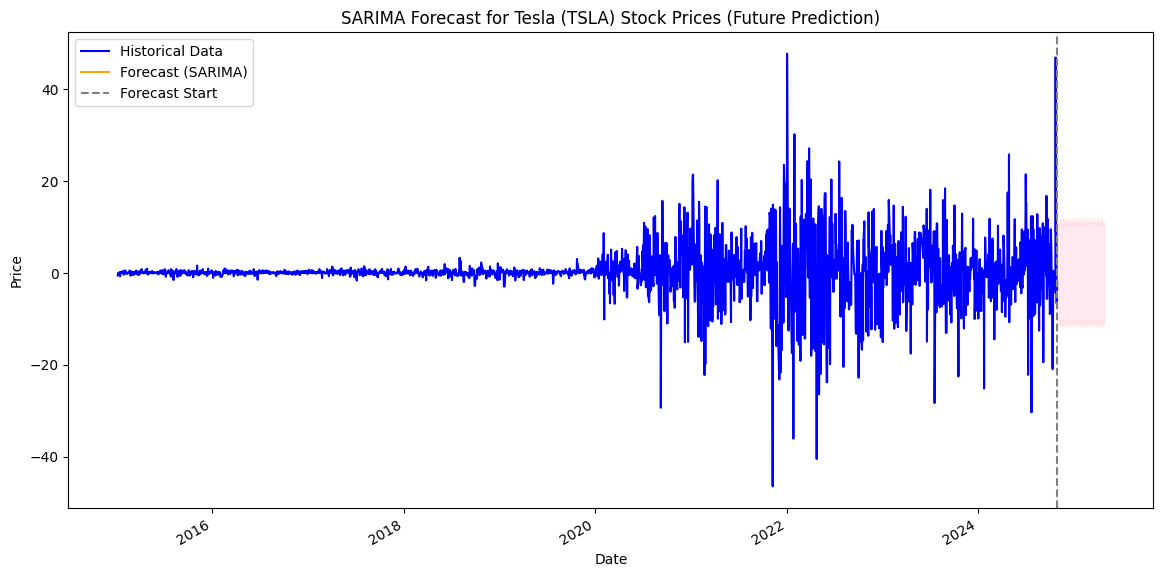

Forecast Summary:
Expected trend over the forecast period: upward
Confidence intervals show the range of possible price fluctuations.
Epoch 1/10


c:\Users\Naim\Time Series Forecasting Model\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0407
Epoch 2/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0034
Epoch 3/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0037
Epoch 4/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0035
Epoch 5/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0038
Epoch 6/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0042
Epoch 7/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0038
Epoch 8/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0037
Epoch 9/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0037
Epoch 10/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0036
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━

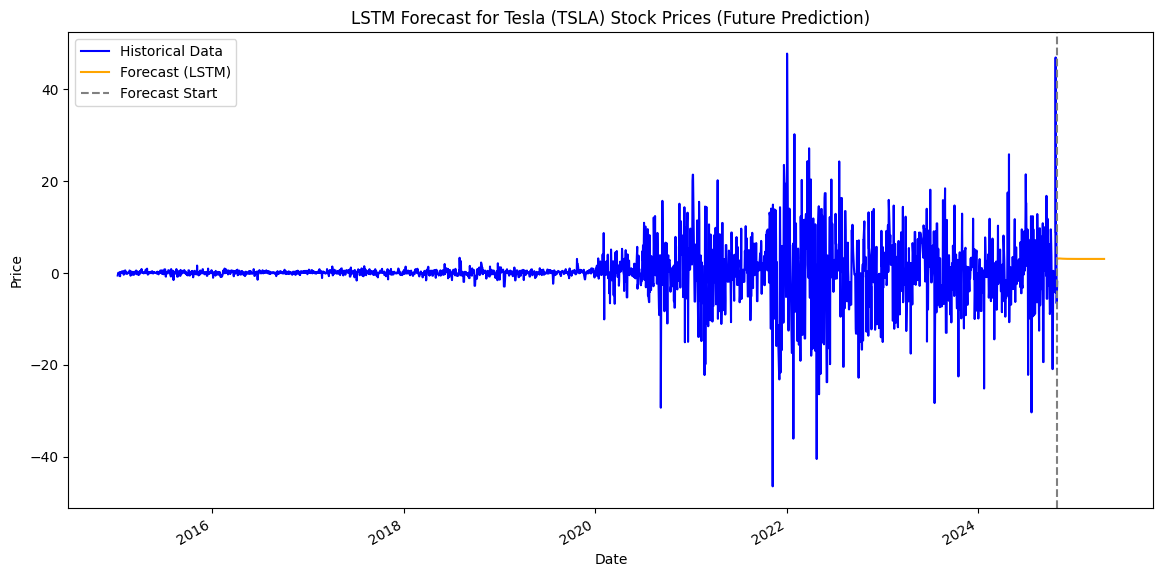

Forecast Summary:
Expected trend over the forecast period: downward

Volatility and Risk Analysis:
Confidence intervals are unavailable for the LSTM model.

Market Opportunities and Risks:
Potential market risk due to an expected price decrease.


c:\Users\Naim\Time Series Forecasting Model\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Naim\Time Series Forecasting Model\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Naim\Time Series Forecasting Model\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Naim\Time Series Forecasting Model\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction resul

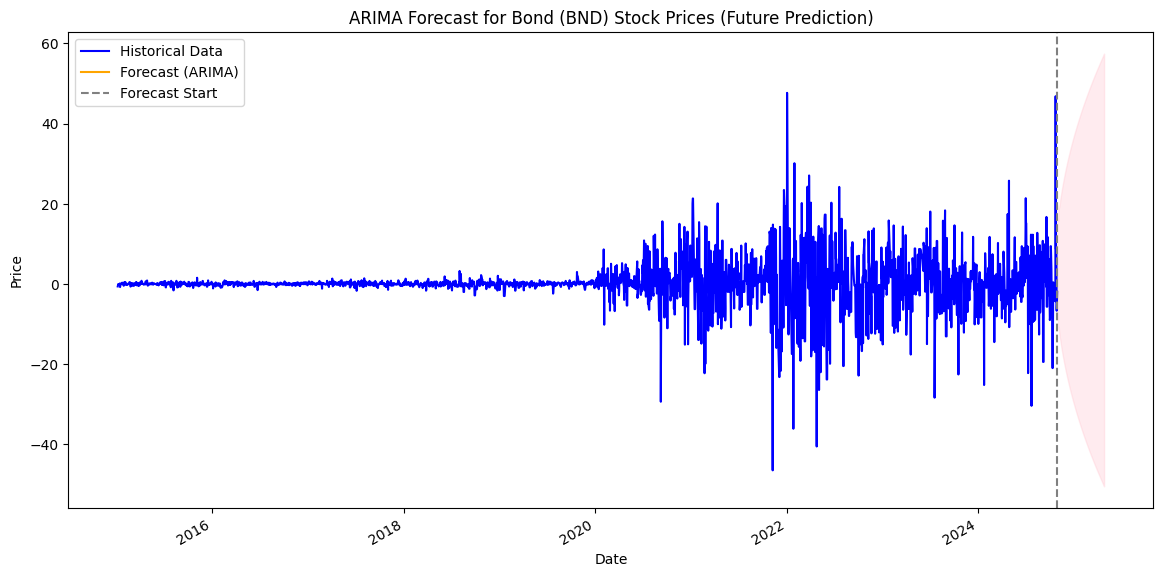

Forecast Summary:
Expected trend over the forecast period: upward
Confidence intervals show the range of possible price fluctuations.


c:\Users\Naim\Time Series Forecasting Model\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Naim\Time Series Forecasting Model\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Naim\Time Series Forecasting Model\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Naim\Time Series Forecasting Model\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling th

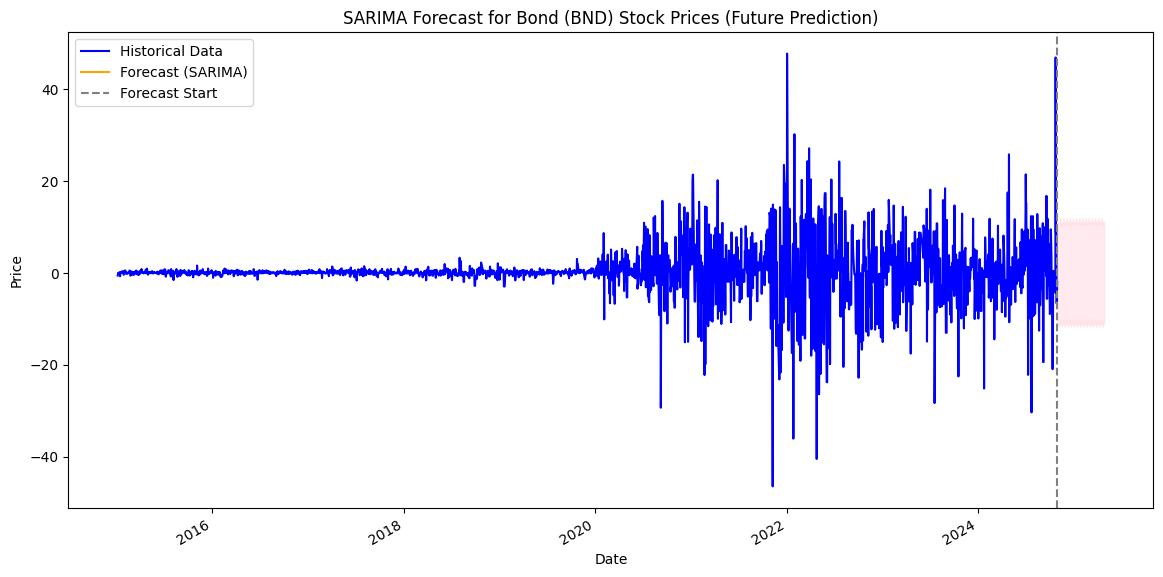

Forecast Summary:
Expected trend over the forecast period: upward
Confidence intervals show the range of possible price fluctuations.
Epoch 1/10


c:\Users\Naim\Time Series Forecasting Model\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0479
Epoch 2/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0038
Epoch 3/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0042
Epoch 4/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0035
Epoch 5/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0037
Epoch 6/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0040
Epoch 7/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0035
Epoch 8/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0033
Epoch 9/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0042
Epoch 10/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0039
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━

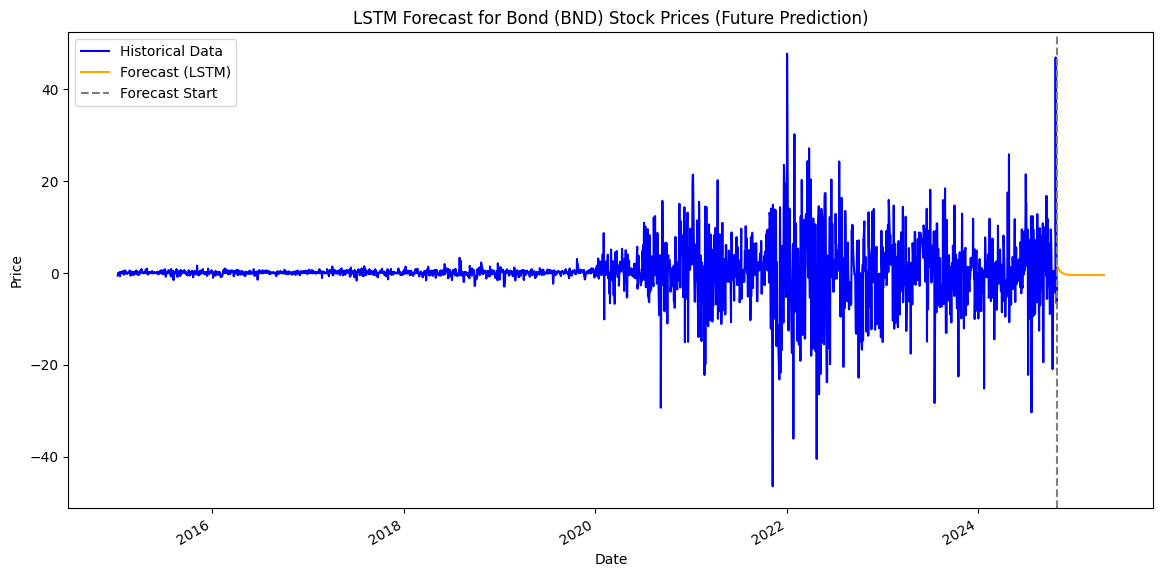

Forecast Summary:
Expected trend over the forecast period: downward

Volatility and Risk Analysis:
Confidence intervals are unavailable for the LSTM model.

Market Opportunities and Risks:
Potential market risk due to an expected price decrease.


c:\Users\Naim\Time Series Forecasting Model\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Naim\Time Series Forecasting Model\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Naim\Time Series Forecasting Model\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Naim\Time Series Forecasting Model\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction resul

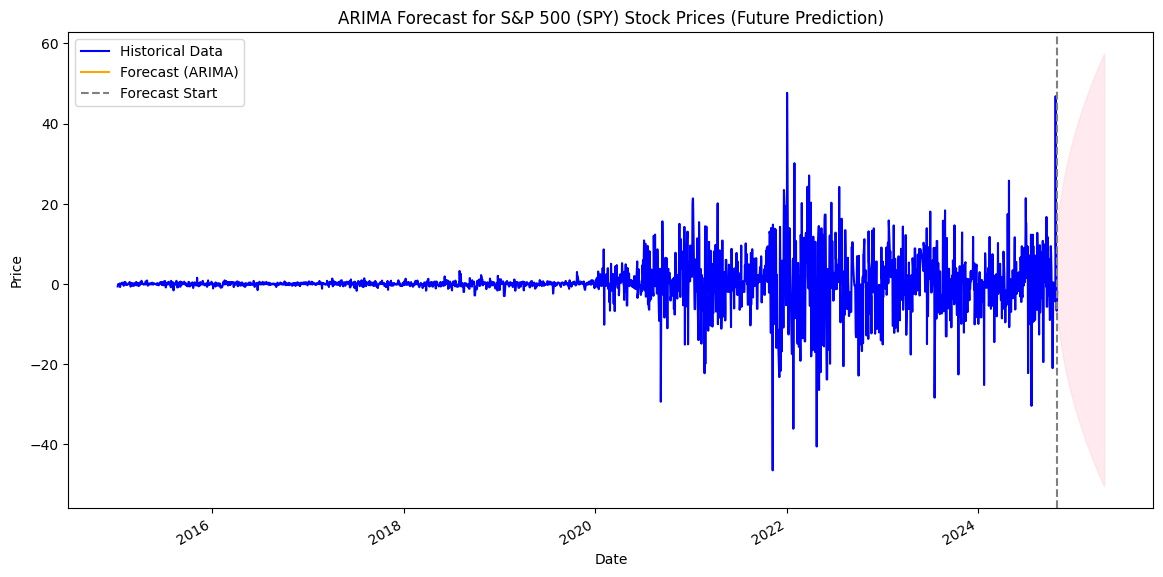

Forecast Summary:
Expected trend over the forecast period: upward
Confidence intervals show the range of possible price fluctuations.


c:\Users\Naim\Time Series Forecasting Model\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Naim\Time Series Forecasting Model\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Naim\Time Series Forecasting Model\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Naim\Time Series Forecasting Model\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling th

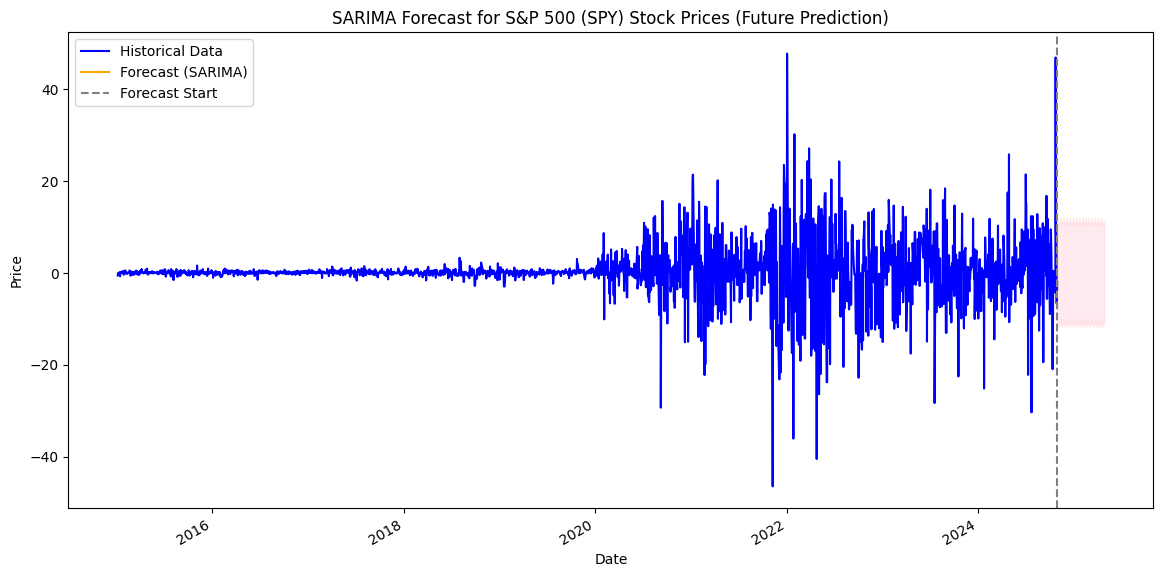

Forecast Summary:
Expected trend over the forecast period: upward
Confidence intervals show the range of possible price fluctuations.
Epoch 1/10


c:\Users\Naim\Time Series Forecasting Model\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


88/88 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0505
Epoch 2/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0043
Epoch 3/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0038
Epoch 4/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0038
Epoch 5/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0037
Epoch 6/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0035
Epoch 7/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0041
Epoch 8/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0037
Epoch 9/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0036
Epoch 10/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0036
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━

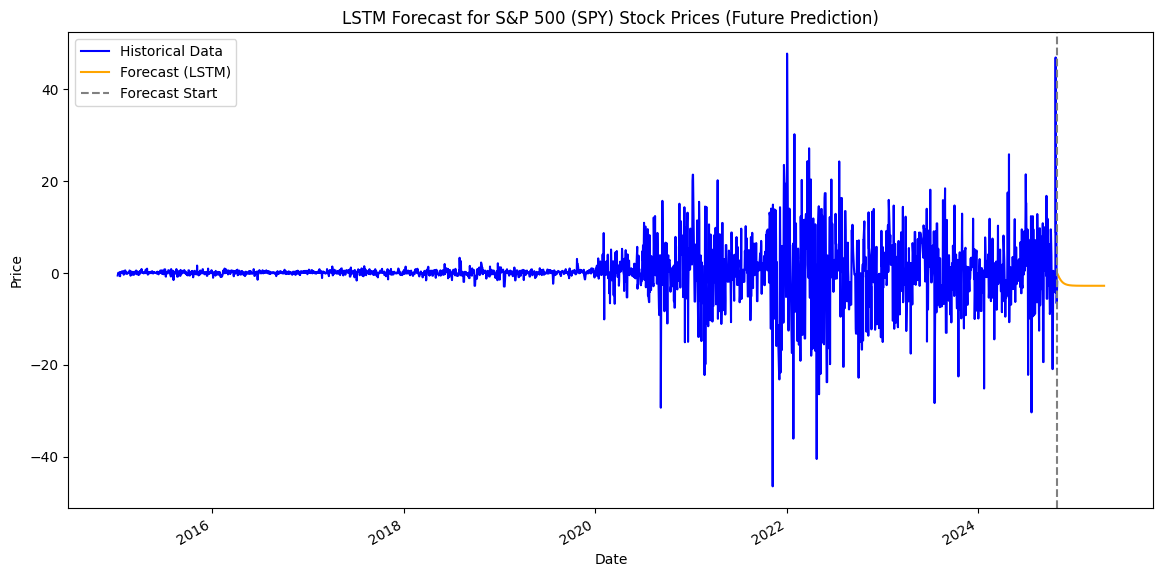

Forecast Summary:
Expected trend over the forecast period: downward

Volatility and Risk Analysis:
Confidence intervals are unavailable for the LSTM model.

Market Opportunities and Risks:
Potential market risk due to an expected price decrease.
LSTM Forecast for TSLA completed.
LSTM Forecast for BND completed.
LSTM Forecast for SPY completed.
Forecast DataFrame:
                                TSLA       BND       SPY
2024-10-30 00:00:00+00:00  3.105374  1.561438 -0.122440
2024-10-31 00:00:00+00:00  3.066738  1.395818 -0.252586
2024-11-01 00:00:00+00:00  3.057575  1.248104 -0.387418
2024-11-02 00:00:00+00:00  3.061929  1.115452 -0.520766
2024-11-03 00:00:00+00:00  3.070745  0.995246 -0.649878


<Figure size 1000x600 with 0 Axes>

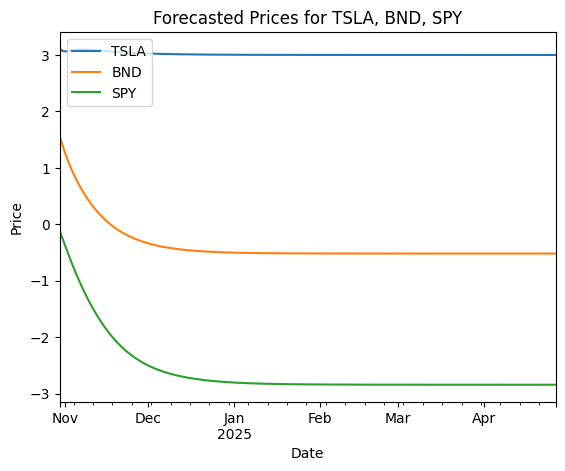

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from financial_analysis import forecast_and_analyze  # Import your forecast function here

# Load and Prepare Data
data = pd.read_csv('../data/cleaned_financial_data.csv', parse_dates=['Date'], index_col='Date')
tsla_data = data['TSLA']
bnd_data = data['BND']
spy_data = data['SPY']
check_stationarity(tsla_data) 
tsla_data_diff = tsla_data.diff().dropna()
bnd_data_diff = tsla_data.diff().dropna()
spy_data_diff = tsla_data.diff().dropna()
check_stationarity(tsla_data_diff) 
check_stationarity(bnd_data_diff)
check_stationarity(spy_data_diff) # Check stationarity again after differencing

# Convert to datetime and set frequency to daily
tsla_data_diff.index = pd.to_datetime(tsla_data_diff.index)
bnd_data_diff.index = pd.to_datetime(bnd_data_diff.index)
spy_data_diff.index = pd.to_datetime(spy_data_diff.index)
tsla_data_diff = tsla_data_diff.asfreq('D').fillna(method='ffill')  # forward fill
bnd_data_diff = bnd_data_diff.asfreq('D').fillna(method='ffill')
spy_data_diff = spy_data_diff.asfreq('D').fillna(method='ffill')

# Split Data (80% Train, 20% Test)
train_size = int(len(tsla_data_diff) * 0.8)
shared_train_dates = tsla_data_diff.sample(frac=0.8, random_state=42).sort_index().index

# Create train and test datasets for each asset using the same date range
train_data = tsla_data_diff.loc[shared_train_dates]
test_data = tsla_data_diff.drop(train_data.index)

train_data_bnd = bnd_data_diff.loc[shared_train_dates]
test_data_bnd = bnd_data_diff.drop(train_data.index)

train_data_spy = spy_data_diff.loc[shared_train_dates]
test_data_spy = spy_data_diff.drop(train_data.index)

# Forecast Period
forecast_period = 180

# Define a helper function to extract forecast
def extract_forecast(forecast_result, model_name, asset_name):
    if forecast_result is not None:
        print(f"{model_name} Forecast for {asset_name} completed.")
        return forecast_result['forecast']
    else:
        print(f"{model_name} Forecast for {asset_name} could not be generated.")
        return pd.Series([None] * forecast_period, index=pd.date_range(start=train_data.index[-1], periods=forecast_period, freq='D'))

# Generate Forecasts for each model and asset
arima_tsla = forecast_and_analyze(train_data, model_type="arima", forecast_period=forecast_period, asset_name="Tesla (TSLA)")
sarima_tsla = forecast_and_analyze(train_data, model_type="sarima", forecast_period=forecast_period, asset_name="Tesla (TSLA)")
lstm_tsla = forecast_and_analyze(train_data, model_type="lstm", forecast_period=forecast_period, asset_name="Tesla (TSLA)")

arima_bnd = forecast_and_analyze(train_data_bnd, model_type="arima", forecast_period=forecast_period, asset_name="Bond (BND)")
sarima_bnd = forecast_and_analyze(train_data_bnd, model_type="sarima", forecast_period=forecast_period, asset_name="Bond (BND)")
lstm_bnd = forecast_and_analyze(train_data_bnd, model_type="lstm", forecast_period=forecast_period, asset_name="Bond (BND)")

arima_spy = forecast_and_analyze(train_data_spy, model_type="arima", forecast_period=forecast_period, asset_name="S&P 500 (SPY)")
sarima_spy = forecast_and_analyze(train_data_spy, model_type="sarima", forecast_period=forecast_period, asset_name="S&P 500 (SPY)")
lstm_spy = forecast_and_analyze(train_data_spy, model_type="lstm", forecast_period=forecast_period, asset_name="S&P 500 (SPY)")

# Extract the preferred forecasted prices for each asset
# Using LSTM model as specified
tsla_forecasted_prices = extract_forecast(lstm_tsla, "LSTM", "TSLA")
bnd_forecasted_prices = extract_forecast(lstm_bnd, "LSTM", "BND")
spy_forecasted_prices = extract_forecast(lstm_spy, "LSTM", "SPY")

# Combine these into a DataFrame for portfolio optimization
forecast_df = pd.DataFrame({
    'TSLA': tsla_forecasted_prices,
    'BND': bnd_forecasted_prices,
    'SPY': spy_forecasted_prices
})

# Convert 'None' values to NaN for compatibility and remove all-NaN columns
forecast_df = forecast_df.apply(pd.to_numeric, errors='coerce').dropna(axis=1, how='all')

# Display the forecast data for verification
print("Forecast DataFrame:\n", forecast_df.head())


# Plot the forecasted data (if data exists)
if not forecast_df.empty:
    plt.figure(figsize=(10, 6))
    forecast_df.plot()
    plt.title('Forecasted Prices for TSLA, BND, SPY')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend(loc="upper left")
    plt.show()
else:
    print("No valid forecast data to plot.")



Optimal Portfolio Weights: [1.66533454e-16 7.77156117e-16 1.00000000e+00]
Expected Portfolio Return: 5.244075775146471
Portfolio Volatility (Risk): 1.5268435873033739
Sharpe Ratio: 3.434586108723989
95% Value at Risk for Tesla: -0.0012441457


<Figure size 1200x800 with 0 Axes>

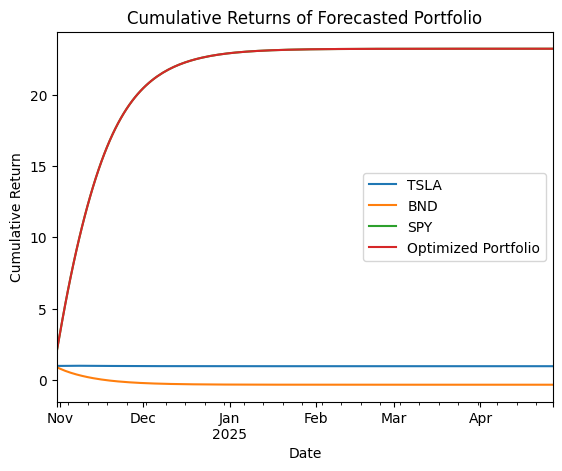

Summary of Portfolio Optimization:
 - Expected Annual Return: 5.244075775146471
 - Portfolio Volatility: 1.5268435873033739
 - Sharpe Ratio: 3.434586108723989
 - Optimal Allocation: {'TSLA': np.float64(1.6653345369377348e-16), 'BND': np.float64(7.771561172376096e-16), 'SPY': np.float64(0.9999999999999989)}
 - Value at Risk (95% Confidence) for TSLA: -0.0012441457


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Load forecasted data (assuming it’s saved from Task 3 as forecast_df)
forecast_df = pd.DataFrame({
    'TSLA': tsla_forecasted_prices, 
    'BND': bnd_forecasted_prices,
    'SPY': spy_forecasted_prices
})

# Calculate Daily Returns
daily_returns = forecast_df.pct_change().dropna()

# Calculate Annualized Return (using average daily return * 252 trading days)
annual_returns = daily_returns.mean() * 252

# Covariance Matrix for Daily Returns (annualized)
cov_matrix = daily_returns.cov() * 252

# Define initial portfolio weights
initial_weights = np.array([1/3, 1/3, 1/3])  # Equal allocation to start

# Function to calculate portfolio metrics
def portfolio_performance(weights, returns, cov_matrix):
    port_return = np.dot(weights, returns)  # Expected portfolio return
    port_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))  # Portfolio risk
    sharpe_ratio = port_return / port_volatility  # Sharpe Ratio
    return port_return, port_volatility, sharpe_ratio

# Objective function: Negative Sharpe Ratio (for minimization)
def neg_sharpe_ratio(weights, returns, cov_matrix):
    return -portfolio_performance(weights, returns, cov_matrix)[2]

# Constraints: Weights sum to 1
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})
# Bounds: Weights between 0 and 1
bounds = tuple((0, 1) for _ in range(len(initial_weights)))

# Optimization to maximize Sharpe Ratio
optimal_results = minimize(neg_sharpe_ratio, initial_weights, args=(annual_returns, cov_matrix),
                           method='SLSQP', bounds=bounds, constraints=constraints)

# Optimal weights and portfolio performance
optimal_weights = optimal_results.x
opt_return, opt_volatility, opt_sharpe = portfolio_performance(optimal_weights, annual_returns, cov_matrix)

# Value at Risk (VaR) calculation for Tesla at 95% confidence
confidence_level = 0.95
var_tsla = np.percentile(daily_returns['TSLA'], (1 - confidence_level) * 100)

# Display Portfolio Metrics
print("Optimal Portfolio Weights:", optimal_weights)
print("Expected Portfolio Return:", opt_return)
print("Portfolio Volatility (Risk):", opt_volatility)
print("Sharpe Ratio:", opt_sharpe)
print("95% Value at Risk for Tesla:", var_tsla)

# Cumulative Returns Chart
forecast_cumulative_returns = (daily_returns + 1).cumprod()
forecast_cumulative_returns['Portfolio'] = (daily_returns @ optimal_weights + 1).cumprod()

plt.figure(figsize=(12, 8))
forecast_cumulative_returns.plot()
plt.title('Cumulative Returns of Forecasted Portfolio')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend(['TSLA', 'BND', 'SPY', 'Optimized Portfolio'])
plt.show()

# Summary
print("Summary of Portfolio Optimization:")
print(" - Expected Annual Return:", opt_return)
print(" - Portfolio Volatility:", opt_volatility)
print(" - Sharpe Ratio:", opt_sharpe)
print(" - Optimal Allocation:", dict(zip(forecast_df.columns, optimal_weights)))
print(" - Value at Risk (95% Confidence) for TSLA:", var_tsla)
